# Data pre-processing and exploration

## Set-up and data import

In [53]:
# setting up matplotlib settings
# Source: https://towardsdatascience.com/making-matplotlib-beautiful-by-default-d0d41e3534fd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.font_manager as font_manager

# font
font_dirs = ['/Library/Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

plt.rcParams['font.family'] = 'DIN Condensed Bold'

# set matplotlib aesthetics
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

sns.set(rc={
            'axes.axisbelow': False,
            'axes.edgecolor': 'lightgrey',
            'axes.facecolor': 'None',
            'axes.grid': False,
            'axes.labelcolor': 'dimgrey',
            'axes.spines.right': False,
            'axes.spines.top': False,
            'figure.facecolor': 'white',
            'lines.solid_capstyle': 'round',
            'patch.edgecolor': 'w',
            'patch.force_edgecolor': True,
            'text.color': 'dimgrey',
            'xtick.bottom': False,
            'xtick.color': 'dimgrey',
            'xtick.direction': 'out',
            'xtick.top': False,
            'ytick.color': 'dimgrey',
            'ytick.direction': 'out',
            'ytick.left': False,
            'ytick.right': False,
            'savefig.dpi': 800})

#plt.rcParams["savefig.dpi"] = 'figure'
sns.set_context("notebook", rc={"font.size":12,
                                "axes.titlesize":16,
                                "axes.labelsize":16})

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set(style="whitegrid")
import re
import text_to_x as ttx

In [3]:
data = pd.read_csv("data/china-user-tweets-2020-08-26.csv")

In [4]:
data.head()

,id,time,created_at,from_user_name,text,filter_level,possibly_sensitive,withheld_copyright,withheld_scope,truncated,...,media_id,media_urls,media_type,media_indice_start,media_indice_end,photo_sizes_width,photo_sizes_height,photo_resize,mentions,hashtags
0,1262699470946516992,1589885988,2020-05-19 10:59:48,ChinaEUMission,All parties have reached consensus on a draft ...,low,0.0,NaN,NaN,NaN,...,1262697877803077632,https://pbs.twimg.com/media/EYYBB6EXkAAyrEA.jpg,photo,281,304,635,357,fit,WHO,NaN
1,1262705175489363968,1589887348,2020-05-19 11:22:28,ChinaEUMission,China's railway system is expected to reach 14...,low,0.0,NaN,NaN,NaN,...,1262704822089912321,https://pbs.twimg.com/media/EYYHWHjXkAEgjF_.jpg,photo,269,292,512,341,fit,NaN,NaN
2,1262747333747343366,1589897399,2020-05-19 14:09:59,ChinaEUMission,China has exported over 50 billion masks since...,low,0.0,NaN,NaN,NaN,...,1262747210246049794,https://pbs.twimg.com/media/EYYt5bvU0AI_Ivr.jpg,photo,250,273,2048,1366,fit,NaN,StrongerTogether
3,1262753525655719938,1589898875,2020-05-19 14:34:35,zlj517,RT @SpokespersonCHN: Not the first time to bas...,low,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SpokespersonCHN,NaN
4,1262753542101581830,1589898879,2020-05-19 14:34:39,zlj517,RT @SpokespersonCHN: That what does not kill y...,low,0.0,NaN,NaN,NaN,...,1262742771380543490,https://pbs.twimg.com/media/EYYp3DrUYAIolQR.jpg,photo,77,100,1080,595,fit,SpokespersonCHN,NaN


In [20]:
data.describe()

,id,time,possibly_sensitive,withheld_copyright,withheld_scope,truncated,retweet_count,favorite_count,in_reply_to_status_id,quoted_status_id,...,from_user_verified,from_user_utcoffset,from_user_timezone,from_user_lang,from_user_tweetcount,from_user_followercount,from_user_friendcount,from_user_favourites_count,from_user_listed,from_user_withheld_scope
count,3.933300e+04,3.933300e+04,32282.000000,0.0,0.0,0.0,39333.0,39333.0,1.935000e+03,2.181000e+03,...,39333.000000,0.0,0.0,0.0,39333.000000,3.933300e+04,39333.000000,39333.000000,39333.000000,0.0
mean,1.280156e+18,1.594048e+09,0.000279,NaN,NaN,NaN,0.0,0.0,1.279151e+18,1.279798e+18,...,0.950728,NaN,NaN,NaN,92947.973203,1.700816e+06,6963.021737,4951.130527,3181.747642,NaN
std,1.019978e+16,2.431817e+06,0.016695,NaN,NaN,NaN,0.0,0.0,9.929666e+15,1.022447e+16,...,0.216437,NaN,NaN,NaN,61056.350830,1.537898e+06,33366.467642,22878.476160,2323.737845,NaN
min,1.262699e+18,1.589886e+09,0.000000,NaN,NaN,NaN,0.0,0.0,1.244689e+18,1.236160e+18,...,0.000000,NaN,NaN,NaN,235.000000,1.610000e+02,9.000000,0.000000,0.000000,NaN
25%,1.271134e+18,1.591897e+09,0.000000,NaN,NaN,NaN,0.0,0.0,1.270125e+18,1.271230e+18,...,1.000000,NaN,NaN,NaN,43700.000000,4.821100e+05,155.000000,96.000000,781.000000,NaN
50%,1.280131e+18,1.594042e+09,0.000000,NaN,NaN,NaN,0.0,0.0,1.280131e+18,1.279591e+18,...,1.000000,NaN,NaN,NaN,125616.000000,1.752379e+06,517.000000,282.000000,4052.000000,NaN
75%,1.288753e+18,1.596098e+09,0.000000,NaN,NaN,NaN,0.0,0.0,1.286745e+18,1.288379e+18,...,1.000000,NaN,NaN,NaN,153546.000000,1.891277e+06,540.000000,375.000000,4448.000000,NaN
max,1.298410e+18,1.598400e+09,1.000000,NaN,NaN,NaN,0.0,0.0,1.298146e+18,1.298268e+18,...,1.000000,NaN,NaN,NaN,163027.000000,4.398398e+06,179191.000000,122942.000000,6596.000000,NaN


## User account filtering
Using the list provided at: https://docs.google.com/document/d/1q4XxcWuYIAu-DRc45zEbbE_Ybq5-jxRz/edit# 

In [15]:
# see unique accounts
user_list = data.from_user_name.unique()
user_list

array(['ChinaEUMission', 'zlj517', 'overseaschina', 'globaltimesnews',
       'koimagazinefr', 'CNS1952', 'huayunews', 'ChinaDaily', 'PDChinese',
       'AmbassadeChine', 'dw_chinese', 'ChinaBritain', 'ajplusfrancais',
       'SpokespersonCHN', 'ajcf_fr', 'euchinahub', 'ChinaEmbGermany',
       'AmbLiuXiaoMing', 'ChineseEmbinUK', 'BuonTAN', 'EUAmbChina',
       'ChinaBritTech'], dtype=object)

In [23]:
# remove accounts that are not marked in yellow in the google doc
#non_yellow = ['koimagazinefr',
#              'dw_chinese', 
#              'ChinaBritain', 
#              'ajplusfrancais', 
#              'ajcf_fr', 
#              'BuonTAN',
#              'EUAmbChina',
#              'ChinaBritTech'
#             ]

yellow_red = ["AmbLiuXiaoMing",
              "AmbassadeChine", 
              "CNS1952", 
              "ChinaDaily", 
              "ChinaEUMission",
              "ChinaEmbGermany",
              "ChineseEmbinUK",
              "ChinoisEnFrance",
              "PDChinese",
              "SpokespersonCHN", 
              "chinaembassyusa",
              "euchinahub",
              "globaltimesnews",
              "huayunews",
              "mfa_china",
              "ouzhounews",
              "overseaschina",
              "zlj517"]

clean_list = [user for user in user_list if user in yellow_red]
missing = [user for user in yellow_red if user not in clean_list]
missing

clean_list

['ChinaEUMission',
 'zlj517',
 'overseaschina',
 'globaltimesnews',
 'CNS1952',
 'huayunews',
 'ChinaDaily',
 'PDChinese',
 'AmbassadeChine',
 'SpokespersonCHN',
 'euchinahub',
 'ChinaEmbGermany',
 'AmbLiuXiaoMing',
 'ChineseEmbinUK']

In [62]:
missing

['ChinoisEnFrance', 'chinaembassyusa', 'mfa_china', 'ouzhounews']

Yellow accounts present in goolge doc, but missing in the data:
['ChinoisEnFrance', 'chinaembassyusa', 'mfa_china', 'ouzhounews']


In [30]:
# filter data to only have users from clean_list
data_clean = data[data['from_user_name'].isin(clean_list)]

## Getting to know the dataframe

In [31]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36568 entries, 0 to 39332
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           36568 non-null  int64  
 1   time                         36568 non-null  int64  
 2   created_at                   36568 non-null  object 
 3   from_user_name               36568 non-null  object 
 4   text                         36568 non-null  object 
 5   filter_level                 36568 non-null  object 
 6   possibly_sensitive           29922 non-null  float64
 7   withheld_copyright           0 non-null      float64
 8   withheld_scope               0 non-null      float64
 9   truncated                    0 non-null      float64
 10  retweet_count                36568 non-null  int64  
 11  favorite_count               36568 non-null  int64  
 12  lang                         36568 non-null  object 
 13  to_user_name    

In [32]:
# drop empty columns
data_clean = data_clean.dropna(axis=1, how='all')
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36568 entries, 0 to 39332
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           36568 non-null  int64  
 1   time                         36568 non-null  int64  
 2   created_at                   36568 non-null  object 
 3   from_user_name               36568 non-null  object 
 4   text                         36568 non-null  object 
 5   filter_level                 36568 non-null  object 
 6   possibly_sensitive           29922 non-null  float64
 7   retweet_count                36568 non-null  int64  
 8   favorite_count               36568 non-null  int64  
 9   lang                         36568 non-null  object 
 10  to_user_name                 1699 non-null   object 
 11  in_reply_to_status_id        1649 non-null   float64
 12  quoted_status_id             2126 non-null   float64
 13  source          

In [33]:
data_clean.head()

,id,time,created_at,from_user_name,text,filter_level,possibly_sensitive,retweet_count,favorite_count,lang,...,media_id,media_urls,media_type,media_indice_start,media_indice_end,photo_sizes_width,photo_sizes_height,photo_resize,mentions,hashtags
0,1262699470946516992,1589885988,2020-05-19 10:59:48,ChinaEUMission,All parties have reached consensus on a draft ...,low,0.0,0,0,en,...,1262697877803077632,https://pbs.twimg.com/media/EYYBB6EXkAAyrEA.jpg,photo,281,304,635,357,fit,WHO,NaN
1,1262705175489363968,1589887348,2020-05-19 11:22:28,ChinaEUMission,China's railway system is expected to reach 14...,low,0.0,0,0,en,...,1262704822089912321,https://pbs.twimg.com/media/EYYHWHjXkAEgjF_.jpg,photo,269,292,512,341,fit,NaN,NaN
2,1262747333747343366,1589897399,2020-05-19 14:09:59,ChinaEUMission,China has exported over 50 billion masks since...,low,0.0,0,0,en,...,1262747210246049794,https://pbs.twimg.com/media/EYYt5bvU0AI_Ivr.jpg,photo,250,273,2048,1366,fit,NaN,StrongerTogether
3,1262753525655719938,1589898875,2020-05-19 14:34:35,zlj517,RT @SpokespersonCHN: Not the first time to bas...,low,0.0,0,0,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SpokespersonCHN,NaN
4,1262753542101581830,1589898879,2020-05-19 14:34:39,zlj517,RT @SpokespersonCHN: That what does not kill y...,low,0.0,0,0,en,...,1262742771380543490,https://pbs.twimg.com/media/EYYp3DrUYAIolQR.jpg,photo,77,100,1080,595,fit,SpokespersonCHN,NaN


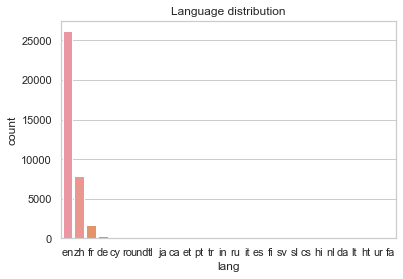

In [34]:
ax = sns.countplot(x="lang", data=data_clean).set_title('Language distribution')

In [68]:
user_freq = data_clean['from_user_name'].value_counts()
user_freq = pd.DataFrame(user_freq).reset_index()
user_freq
missing_freq = pd.DataFrame({"index": missing, 
                    "from_user_name":[0, 0, 0, 0]})
user_freq = user_freq.append(missing_freq)
user_freq

,index,from_user_name
0,globaltimesnews,13428
1,ChinaDaily,8184
2,CNS1952,4390
3,PDChinese,2590
4,AmbassadeChine,1864
5,AmbLiuXiaoMing,1488
6,zlj517,1439
7,overseaschina,747
8,euchinahub,560
9,ChineseEmbinUK,486


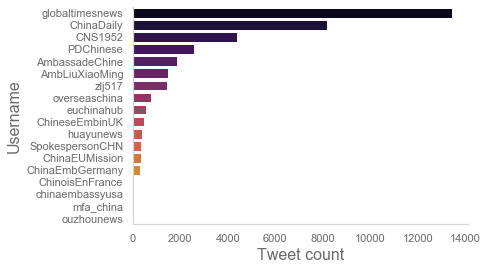

In [71]:
chart = sns.barplot(x="from_user_name", y="index", data=user_freq, palette='inferno')
chart.set(xlabel='Tweet count', ylabel='Username')
chart.figure.savefig('plots/english/user_distribution.png', bbox_inches='tight')

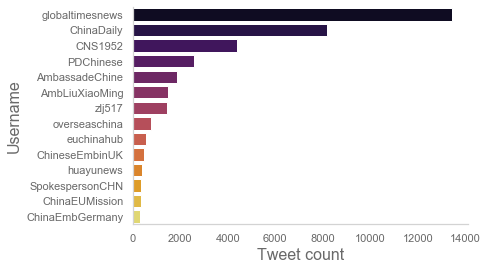

In [57]:
#ax = sns.countplot(x="from_user_name", data=data_clean).set_title('User distribution')
#plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=data_clean,
    y='from_user_name',
    palette='inferno',
    order = data_clean['from_user_name'].value_counts().index)

chart.set(xlabel='Tweet count', ylabel='Username')
#chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
# Save the full figure...
#chart.figure.savefig('plots/english/user_distribution.png', bbox_inches='tight')

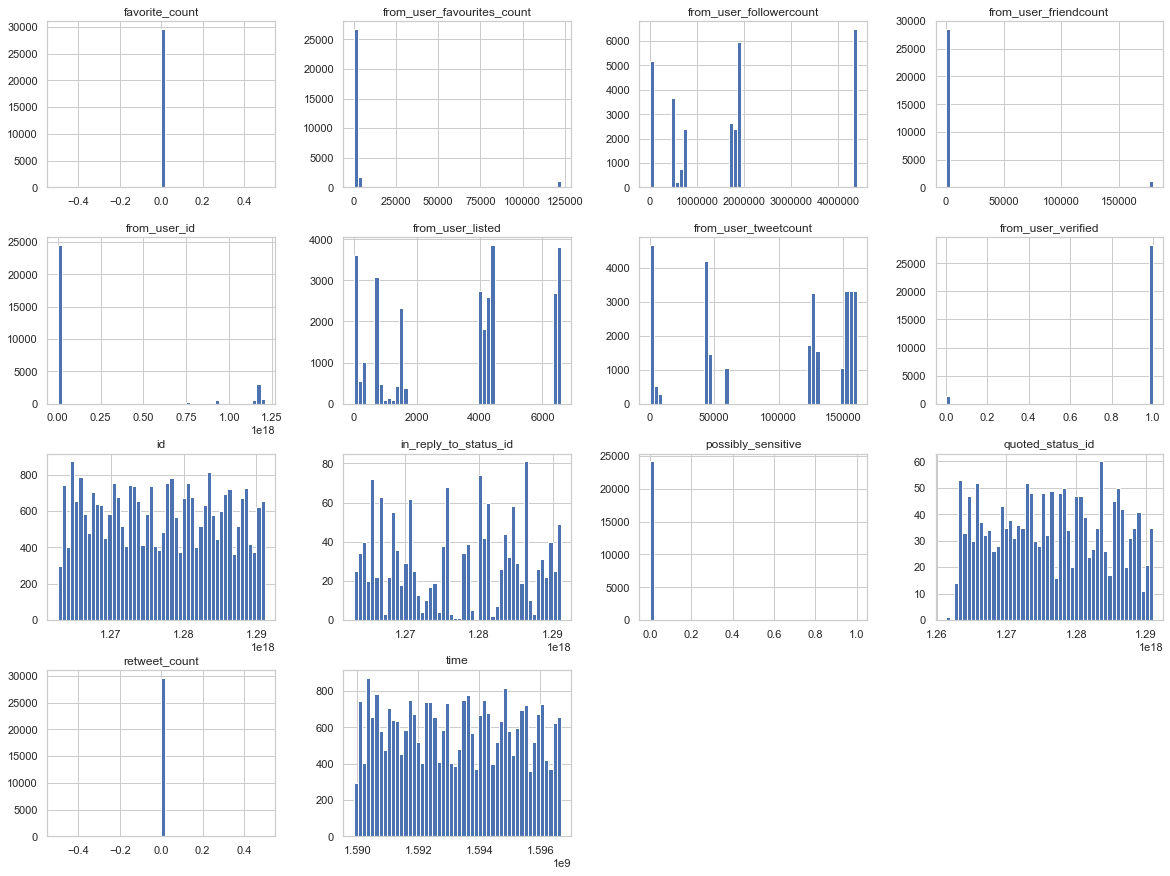

In [10]:
data_clean.hist(bins=50, figsize=(20,15))
plt.show()

## Text pre-processing

In [76]:
# Filter out data that has already been processed
# extract processed tweet ids
processed = pd.read_csv("data/english_preprocessed.csv")
processed.head()

ids = processed['id_str'].tolist()
processed_ids = set(ids)

In [79]:
 # filter data to only have users from clean_list
to_process = data_clean[~data_clean['id'].isin(processed_ids)]

### Reproducing TextToX pipeline from earlier projects

In [80]:
"""
This script performs tokenization, extraction of lemmas, pos-tagging
and ner-tagging on Twitter data.
"""
import os
import time
import re
#import ndjson
import multiprocessing as mp
from functools import partial
import pandas as pd
#import text_to_x as ttx
from text_to_x.utils import detect_lang_polyglot, add_def_args
#stopword = stopwords.words(‘english’)

def chunks(seq, size):
    return (seq[pos:pos + size] for pos in range(0, len(seq), size))

def to_ndjson(df):
    if df.empty:
        return []
    res = []
    for i, row in df.iterrows():
        lang = row['lang']
        d = {'created_at': row['created_at'],
             'user': row['from_user_name'],
             'verified': row['from_user_verified'],
             'id_str': str(row['id']),
             'text': row['text'],
             'retweet_count': row['retweet_count'],
             'favorite_count': row['favorite_count'],
             'lang': lang,
             'follower_count': row['from_user_followercount'],
             'hashtags_bytwitter': row['hashtags']
            }
        res.append(d)
    return res



def preprocess(lang, data):
    lang_posts = [d for d in data if d['lang'] == lang]
    # make placeholders to accumulate processing time
    time_text_extract = 0
    time_stanza = 0
    skipped_counter = 0
    chunk_n = 0
    # chunking - OUTER to avoid memory errors
    chunk_id = 0
    max_length = 20000
    chunked_posts = chunks(lang_posts, max_length)
    big_res = []
    for ch in chunked_posts:
        res = []
        ch = [post for post in ch]
        chunk_id += 1

        # chunking - INNER to handle stanza errors
        chunk_size = 500
        chunked_chunk = chunks(ch, chunk_size)
        for c in chunked_chunk:
            start = time.time()
            chunk_n += 1
            c = [post for post in c]
            texts = [post['text'] for post in c]

            time_text_extract_c = time.time() - start
            time_text_extract += time_text_extract_c

            # preprocess and tokenize using ttt object defined earlier
            start = time.time()
            ttt = ttx.TextToTokens(lang=lang,
                                   tokenize="stanza",
                                   lemmatize="stanza",
                                   pos="stanza",
                                   depparse="stanza",
                                   ner="stanza",
                                   silent=False)
            try:
                ttt.texts_to_tokens(texts)
            except:
                skipped_counter += 1
                continue
            ttt.twitter_format()
            dfs = ttt.get_token_dfs()
            for i, post in enumerate(c):
                post['tokens'] = dfs[i].to_dict()
            res += c
            time_stanza_c = time.time() - start
            time_stanza += time_stanza_c
        
        big_res += res
    return big_res
    
    
    
    #no_url = " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())
    # lower = no_url.lower()
    # word_tokens = nltk.word_tokenize(lower)
    # no_stop = [word for word in word_tokens if word not in stopword]
    #dfs = ttt.texts_to_tokens(no_url)
    #ttt.twitter_format()
    #dfs = ttt.get_token_dfs()
    #return 

def clean_tweet(row):
    text = row['text']
    text = text.lower()
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"[^\w\s]", " ", text)
    return text

### English pre-processing

In [81]:
df = to_ndjson(to_process)
english_data = preprocess('en', df)

2020-08-26 16:09:41 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| ner       | ontonotes |

2020-08-26 16:09:41 INFO: Use device: cpu
2020-08-26 16:09:41 INFO: Loading: tokenize
2020-08-26 16:09:41 INFO: Loading: pos
2020-08-26 16:09:42 INFO: Loading: lemma
2020-08-26 16:09:42 INFO: Loading: depparse
2020-08-26 16:09:43 INFO: Loading: ner
2020-08-26 16:09:45 INFO: Done loading processors!
/Users/anitakurm/anaconda3/envs/text_to_x/lib/python3.6/site-packages/text_to_x/TextToTokens.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ner'][at_idx] = "TWITTER_USER"
/Users/anitakurm/anaconda3/envs/text_to_x/lib/python3.6/site-packages/pan

In [82]:
en_df = pd.DataFrame(english_data)
en_df['text_clean'] = en_df.apply(clean_tweet, axis = 1)
en_df.head()

,created_at,user,verified,id_str,text,retweet_count,favorite_count,lang,follower_count,hashtags_bytwitter,tokens,text_clean
0,2020-08-06 00:00:01,ChinaDaily,1,1291162073158877185,Dalian city in NE China had reported dozens of...,0,0,en,4398262,NaN,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0...",dalian city in ne china had reported dozens of...
1,2020-08-06 00:00:37,globaltimesnews,1,1291162225487548417,Yingtan railway maintenance division conducts ...,0,0,en,1891519,NaN,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0...",yingtan railway maintenance division conducts ...
2,2020-08-06 00:15:01,ChinaDaily,1,1291165848577683463,#ChinaStory Kungfu master in the making! Check...,0,0,en,4398262,ChinaStory; kungfu,"{'n_sent': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0...",chinastory kungfu master in the making check...
3,2020-08-06 00:17:21,zlj517,1,1291166437206302720,RT @SpokespersonCHN: #ABC and #APACNews reveal...,0,0,en,747900,ABC; APACNews; USStateDepartment,"{'n_sent': {0: 0, 1: 0, 2: 0, 4: 0, 5: 0, 7: 0...",rt spokespersonchn abc and apacnews reveal...
4,2020-08-06 00:20:02,globaltimesnews,1,1291167109460963328,China's most rapid nucleic acid testing produc...,0,0,en,1891523,NaN,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0...",china s most rapid nucleic acid testing produc...


In [83]:
en_df_n = en_df.set_index('id_str')
token_df = en_df_n.tokens.apply(pd.Series)
en_df_n = pd.concat([en_df_n, token_df], axis=1)


def lemmas_to_list(row):
     return ' '.join(list(row['lemma'].values()))
                 
#en_df_n['text_lemmatized'] = en_df_n.apply(lemmas_to_list, axis = 1)
#en_df_n.head()

In [84]:
# save processed df
# en_df.to_csv('data/english_preprocessed.csv')
en_df_n.to_csv('data/english_preprocessed_08_26.csv')


### Chinese pre-processing

In [ ]:
chinese_data = preprocess('zh', df)

In [ ]:
zh_df = pd.DataFrame(chinese_data)
zh_df.head()

In [ ]:
zh_df.to_csv('data/chinese_preprocessed.csv')

### French pre-processing

In [ ]:
french_data = preprocess('fr', df)

In [ ]:
french_data

In [ ]:
fr_df = pd.DataFrame(french_data)
fr_df.head()

In [ ]:
fr_df.to_csv('data/french_preprocessed.csv') #empty?

# Simplified pre-processing

In [85]:
df = pd.read_csv("data/china-user-tweets-2020-08-26.csv")

In [86]:
df['text_clean'] = df.apply(clean_tweet, axis = 1)

In [89]:
df_e = df[df['lang'] =="en"]
df_e

,id,time,created_at,from_user_name,text,filter_level,possibly_sensitive,withheld_copyright,withheld_scope,truncated,...,media_urls,media_type,media_indice_start,media_indice_end,photo_sizes_width,photo_sizes_height,photo_resize,mentions,hashtags,text_clean
0,1262699470946516992,1589885988,2020-05-19 10:59:48,ChinaEUMission,All parties have reached consensus on a draft ...,low,0.0,NaN,NaN,NaN,...,https://pbs.twimg.com/media/EYYBB6EXkAAyrEA.jpg,photo,281,304,635,357,fit,WHO,NaN,all parties have reached consensus on a draft ...
1,1262705175489363968,1589887348,2020-05-19 11:22:28,ChinaEUMission,China's railway system is expected to reach 14...,low,0.0,NaN,NaN,NaN,...,https://pbs.twimg.com/media/EYYHWHjXkAEgjF_.jpg,photo,269,292,512,341,fit,NaN,NaN,china s railway system is expected to reach 14...
2,1262747333747343366,1589897399,2020-05-19 14:09:59,ChinaEUMission,China has exported over 50 billion masks since...,low,0.0,NaN,NaN,NaN,...,https://pbs.twimg.com/media/EYYt5bvU0AI_Ivr.jpg,photo,250,273,2048,1366,fit,NaN,StrongerTogether,china has exported over 50 billion masks since...
3,1262753525655719938,1589898875,2020-05-19 14:34:35,zlj517,RT @SpokespersonCHN: Not the first time to bas...,low,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SpokespersonCHN,NaN,rt spokespersonchn not the first time to bas...
4,1262753542101581830,1589898879,2020-05-19 14:34:39,zlj517,RT @SpokespersonCHN: That what does not kill y...,low,0.0,NaN,NaN,NaN,...,https://pbs.twimg.com/media/EYYp3DrUYAIolQR.jpg,photo,77,100,1080,595,fit,SpokespersonCHN,NaN,rt spokespersonchn that what does not kill y...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39325,1298391186151837696,1598395556,2020-08-25 22:45:56,ChinaDaily,#ChinaStory Look at these kids practicing thei...,low,0.0,NaN,NaN,NaN,...,https://pbs.twimg.com/ext_tw_video_thumb/12983...,video,67,90,720,720,fit,NaN,ChinaStory,chinastory look at these kids practicing thei...
39326,1298395229096206339,1598396520,2020-08-25 23:02:00,globaltimesnews,Chinese Valentine’s day proposal: Holding a bu...,low,0.0,NaN,NaN,NaN,...,https://pbs.twimg.com/media/EgQEQ5SU0AAEqOo.jpg,video,239,262,480,270,fit,NaN,NaN,chinese valentine s day proposal holding a bu...
39328,1298399770692780032,1598397603,2020-08-25 23:20:03,globaltimesnews,#Opinion: Italy and #China can expand beyond i...,low,0.0,NaN,NaN,NaN,...,https://pbs.twimg.com/media/EgTXteiXkAE0kjH.jpg,photo,238,261,1200,720,fit,fabiomassimos,Opinion; China; Italy,opinion italy and china can expand beyond i...
39330,1298404806072184837,1598398803,2020-08-25 23:40:03,globaltimesnews,#India's overconfidence in its economic streng...,low,0.0,NaN,NaN,NaN,...,https://pbs.twimg.com/media/EgTcSkFXgAM2ld9.jpg,photo,243,266,1200,720,fit,NaN,India; COVID19,india s overconfidence in its economic streng...


In [161]:
#
user_list = df.from_user_name.unique()
len(user_list)
yellow_red = ["AmbLiuXiaoMing",
              "AmbassadeChine", 
              "CNS1952", 
              "ChinaDaily", 
              "ChinaEUMission",
              "ChinaEmbGermany",
              "ChineseEmbinUK",
              "ChinoisEnFrance",
              "PDChinese",
              "SpokespersonCHN", 
              "chinaembassyusa",
              "euchinahub",
              "globaltimesnews",
              "huayunews",
              "mfa_china",
              "ouzhounews",
              "overseaschina",
              "zlj517"]

clean_list = [user for user in user_list if user in yellow_red]
missing = [user for user in yellow_red if user not in clean_list]
missing

['ChinoisEnFrance', 'chinaembassyusa', 'mfa_china', 'ouzhounews']

In [167]:
len(clean_list)

14

In [162]:
# filter data to only have users from clean_list
df_clean = df[df['from_user_name'].isin(clean_list)]

In [128]:
user_freq = df_clean['from_user_name'].value_counts()
user_freq = pd.DataFrame(user_freq).reset_index()
user_freq
missing_freq = pd.DataFrame({"index": missing, 
                    "from_user_name":[0, 0, 0, 0]})
user_freq = user_freq.append(missing_freq)
user_freq

,index,from_user_name
0,globaltimesnews,13428
1,ChinaDaily,8184
2,CNS1952,4390
3,PDChinese,2590
4,AmbassadeChine,1864
5,dw_chinese,1772
6,AmbLiuXiaoMing,1488
7,zlj517,1439
8,overseaschina,747
9,euchinahub,560


In [163]:
user_freq = pd.DataFrame(df_clean.groupby(['from_user_name', 'lang'])['created_at'].count()).reset_index()
user_freq = user_freq[user_freq['lang'].isin(['en', 'zh', 'fr'])]

In [164]:
user_freq = user_freq.sort_values(by=['from_user_name'])

In [165]:
user_freq

,from_user_name,lang,created_at
0,AmbLiuXiaoMing,en,1465
2,AmbLiuXiaoMing,zh,1
5,AmbassadeChine,en,94
8,AmbassadeChine,fr,1720
14,AmbassadeChine,zh,11
17,CNS1952,zh,4265
21,ChinaDaily,en,8128
23,ChinaDaily,fr,5
33,ChinaEUMission,en,340
36,ChinaEUMission,zh,2


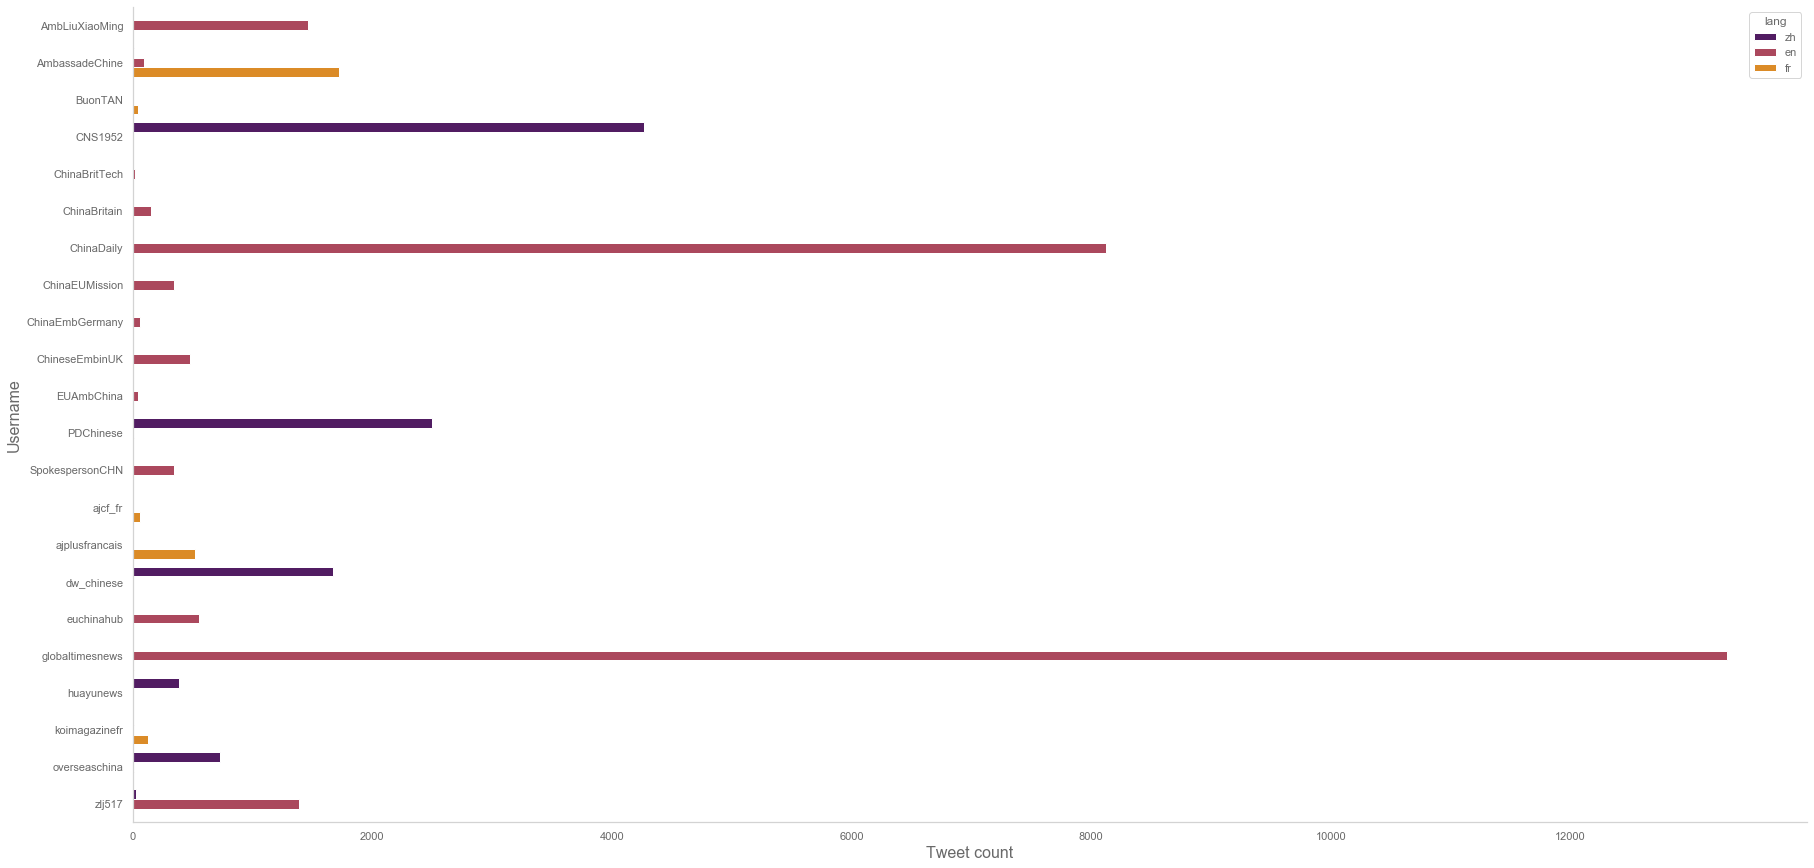

In [150]:
fig, ax = plt.subplots(figsize=(30, 15))
ax = sns.barplot(x="created_at", y="from_user_name", hue="lang", data=user_freq, palette='inferno')
ax.set(xlabel='Tweet count', ylabel='Username')
fig.savefig('plots/english/user_distribution_lang.png', bbox_inches='tight')


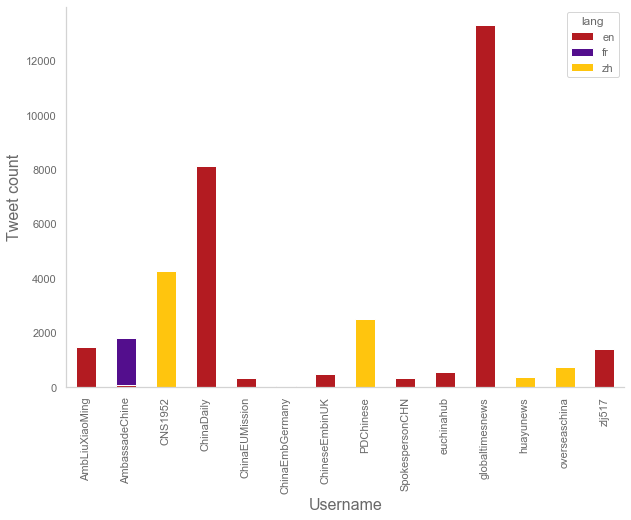

In [172]:
#stacked
pivot_df = user_freq.pivot(index='from_user_name', columns='lang', values='created_at')
pivot_df
colors = ["#b31b21", "#530E8D","#FFC50E"]
ax = pivot_df.loc[:,['en','fr', 'zh']].plot.bar(stacked=True, color = colors, figsize=(10,7))
ax.set(xlabel='Username', ylabel='Tweet count')
ax.figure.savefig('plots/english/user_distribution_lang.png', bbox_inches='tight')

In [174]:
user_list = df_e.from_user_name.unique()
len(user_list)
yellow_red = ["AmbLiuXiaoMing",
              "AmbassadeChine", 
              "CNS1952", 
              "ChinaDaily", 
              "ChinaEUMission",
              "ChinaEmbGermany",
              "ChineseEmbinUK",
              "ChinoisEnFrance",
              "PDChinese",
              "SpokespersonCHN", 
              "chinaembassyusa",
              "euchinahub",
              "globaltimesnews",
              "huayunews",
              "mfa_china",
              "ouzhounews",
              "overseaschina",
              "zlj517"]

clean_list = [user for user in user_list if user in yellow_red]
missing = [user for user in yellow_red if user not in clean_list]
missing
clean_list

['ChinaEUMission',
 'zlj517',
 'globaltimesnews',
 'ChinaDaily',
 'SpokespersonCHN',
 'euchinahub',
 'AmbLiuXiaoMing',
 'ChineseEmbinUK',
 'AmbassadeChine',
 'ChinaEmbGermany',
 'overseaschina',
 'PDChinese']

In [177]:
df_e_clean = df_e[df_e['from_user_name'].isin(clean_list)]
df_e_clean

,id,time,created_at,from_user_name,text,filter_level,possibly_sensitive,withheld_copyright,withheld_scope,truncated,...,media_urls,media_type,media_indice_start,media_indice_end,photo_sizes_width,photo_sizes_height,photo_resize,mentions,hashtags,text_clean
0,1262699470946516992,1589885988,2020-05-19 10:59:48,ChinaEUMission,All parties have reached consensus on a draft ...,low,0.0,NaN,NaN,NaN,...,https://pbs.twimg.com/media/EYYBB6EXkAAyrEA.jpg,photo,281,304,635,357,fit,WHO,NaN,all parties have reached consensus on a draft ...
1,1262705175489363968,1589887348,2020-05-19 11:22:28,ChinaEUMission,China's railway system is expected to reach 14...,low,0.0,NaN,NaN,NaN,...,https://pbs.twimg.com/media/EYYHWHjXkAEgjF_.jpg,photo,269,292,512,341,fit,NaN,NaN,china s railway system is expected to reach 14...
2,1262747333747343366,1589897399,2020-05-19 14:09:59,ChinaEUMission,China has exported over 50 billion masks since...,low,0.0,NaN,NaN,NaN,...,https://pbs.twimg.com/media/EYYt5bvU0AI_Ivr.jpg,photo,250,273,2048,1366,fit,NaN,StrongerTogether,china has exported over 50 billion masks since...
3,1262753525655719938,1589898875,2020-05-19 14:34:35,zlj517,RT @SpokespersonCHN: Not the first time to bas...,low,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SpokespersonCHN,NaN,rt spokespersonchn not the first time to bas...
4,1262753542101581830,1589898879,2020-05-19 14:34:39,zlj517,RT @SpokespersonCHN: That what does not kill y...,low,0.0,NaN,NaN,NaN,...,https://pbs.twimg.com/media/EYYp3DrUYAIolQR.jpg,photo,77,100,1080,595,fit,SpokespersonCHN,NaN,rt spokespersonchn that what does not kill y...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39325,1298391186151837696,1598395556,2020-08-25 22:45:56,ChinaDaily,#ChinaStory Look at these kids practicing thei...,low,0.0,NaN,NaN,NaN,...,https://pbs.twimg.com/ext_tw_video_thumb/12983...,video,67,90,720,720,fit,NaN,ChinaStory,chinastory look at these kids practicing thei...
39326,1298395229096206339,1598396520,2020-08-25 23:02:00,globaltimesnews,Chinese Valentine’s day proposal: Holding a bu...,low,0.0,NaN,NaN,NaN,...,https://pbs.twimg.com/media/EgQEQ5SU0AAEqOo.jpg,video,239,262,480,270,fit,NaN,NaN,chinese valentine s day proposal holding a bu...
39328,1298399770692780032,1598397603,2020-08-25 23:20:03,globaltimesnews,#Opinion: Italy and #China can expand beyond i...,low,0.0,NaN,NaN,NaN,...,https://pbs.twimg.com/media/EgTXteiXkAE0kjH.jpg,photo,238,261,1200,720,fit,fabiomassimos,Opinion; China; Italy,opinion italy and china can expand beyond i...
39330,1298404806072184837,1598398803,2020-08-25 23:40:03,globaltimesnews,#India's overconfidence in its economic streng...,low,0.0,NaN,NaN,NaN,...,https://pbs.twimg.com/media/EgTcSkFXgAM2ld9.jpg,photo,243,266,1200,720,fit,NaN,India; COVID19,india s overconfidence in its economic streng...


In [176]:
13309+8128+1465+1386+550+477+342+340+94+56+10+8

26165

In [178]:
df_e_clean.to_csv("data/english_preprocessed_simplified.csv")